# House prices analysis and prediction

### The dataset include 9 different variables including Housing area, geographical locations, income,etc and 1 response varibale median_house_value. I will use these data to conduct house prices analysis and prediction.

## Import dataset and data cleaning
### First check which columns have null value, then considering methods to fill null values. I chosen median value instead of mean value to fill null values considering that outliars may impact the result

In [133]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
house = pd.read_csv("D:/housing.csv")
house.info()
print(house.isnull().sum())
# fill null value by using mean value of total_bedrooms  
mean = house["total_bedrooms"].mean()
house["total_bedrooms"].fillna(mean, inplace=True)
house.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity  

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Features engineering


### First I observed distributions for each of variables and used histgrams to show the result.

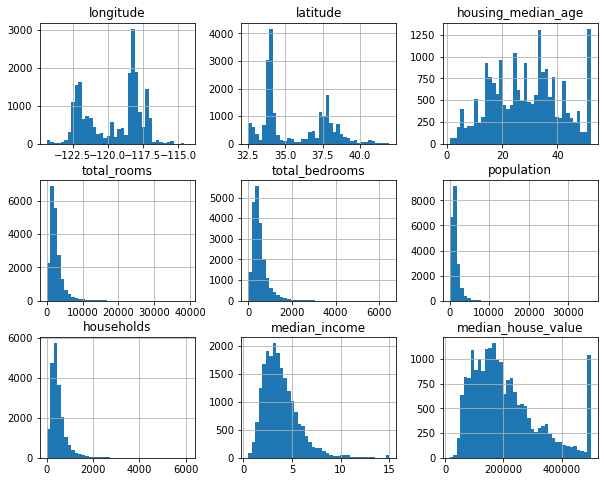

In [134]:
house.describe()
import matplotlib.pyplot as plt
house.hist(bins=40, figsize=(10, 8))
plt.show()

### For plots we can see that total_rooms, total_bedrooms,population, households, median_income,median_house_value are likely to have normal distribution. 

### Considering that some of factors are "total" value, we can do some feature engineering to focus on "per" value to analyze relationships better
### Here I add rooms_per_person, population_per_household, bedrooms_per_house

### I also transform ocean_proximity factor into a numeric factor 

In [135]:
house["rooms_per_person"] = house["total_rooms"]/house["population"]
house["population_per_household"] = house["population"]/house["households"]
house["bedrooms_per_house"] = house["total_bedrooms"]/house["total_rooms"]
ocean_mapping={"NEAR BAY":0,"<1H OCEAN":1,"INLAND":2,"NEAR OCEAN":3,"ISLAND":4}
house["Ocean_category"]=house["ocean_proximity"].map(ocean_mapping)
house.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_person,population_per_household,bedrooms_per_house,Ocean_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,2.732919,2.555556,0.146591,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2.956685,2.109842,0.155797,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2.957661,2.802260,0.129516,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,2.283154,2.547945,0.184458,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,2.879646,2.181467,0.172096,0


## Outliars detectation
### Then I check that whether there are outliars in each variables and if they have, I would do some transformations.

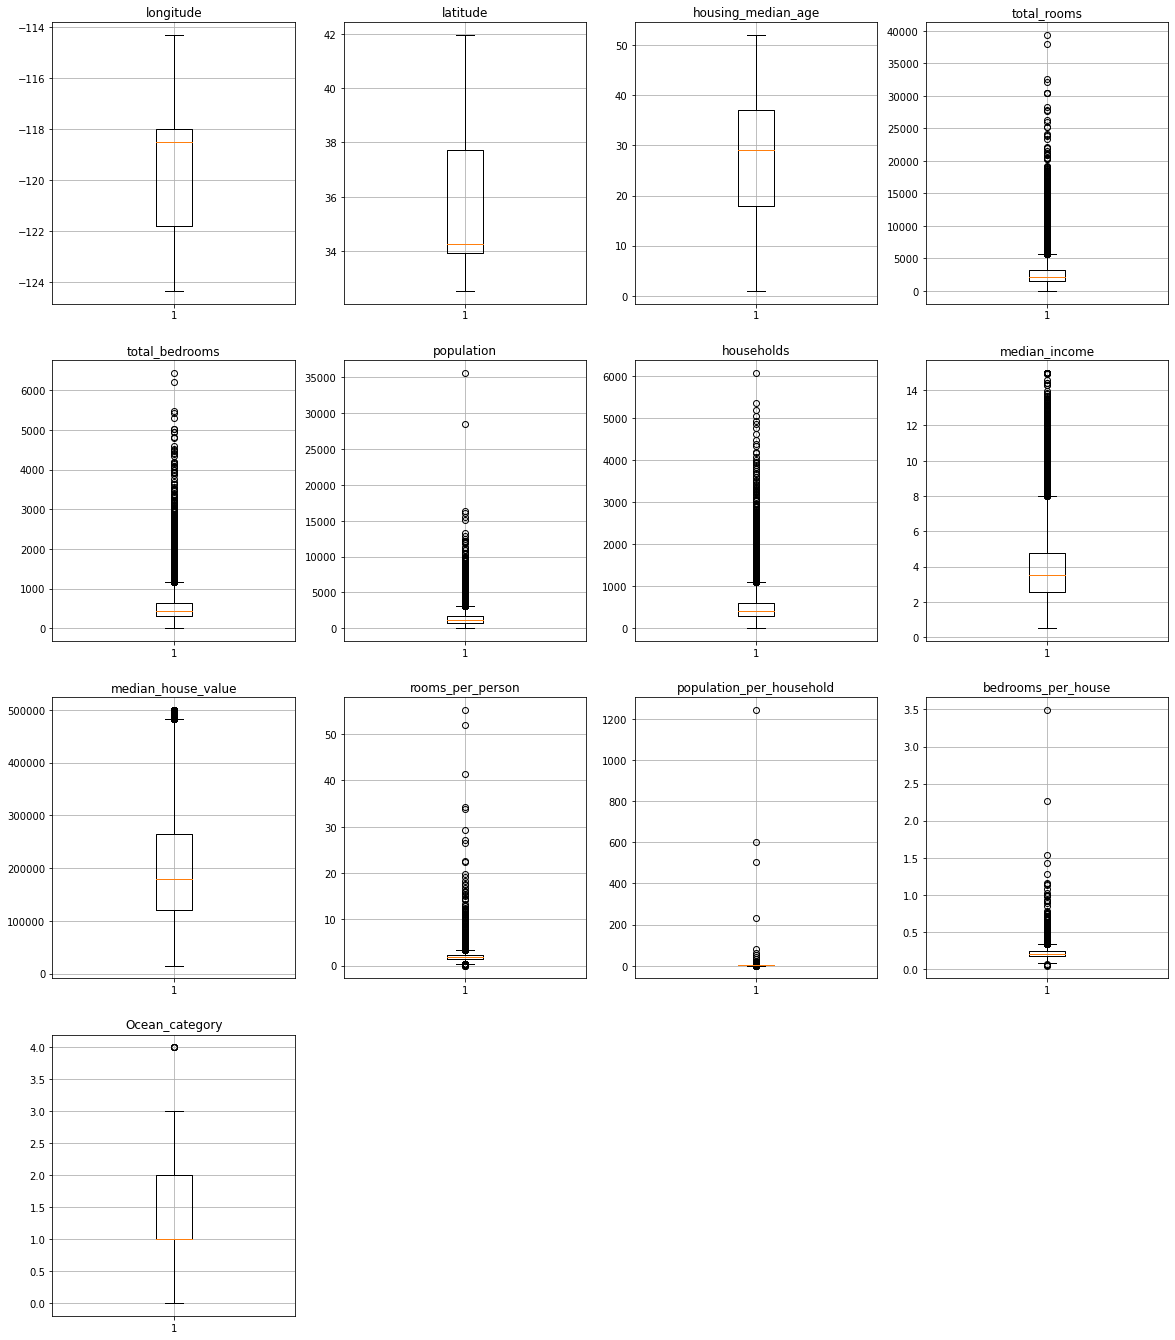

In [136]:
col_names = {'longitude':1,'latitude':2,'housing_median_age':3,'total_rooms':4,'total_bedrooms':5,'population':6,'households':7,'median_income':8,'median_house_value':9,'rooms_per_person':10,'population_per_household':11,'bedrooms_per_house':12,'Ocean_category':13}
# Detect outliers in each variable using box plots.
fig = plt.figure(figsize=(20,30))

for variable,i in col_names.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(house[variable])
                     plt.title(variable)
                     plt.grid(True)
    
plt.show()

### From above plots we can see that most of variables have outliars. I chose to use winsorize to adjust data to remove outliars.

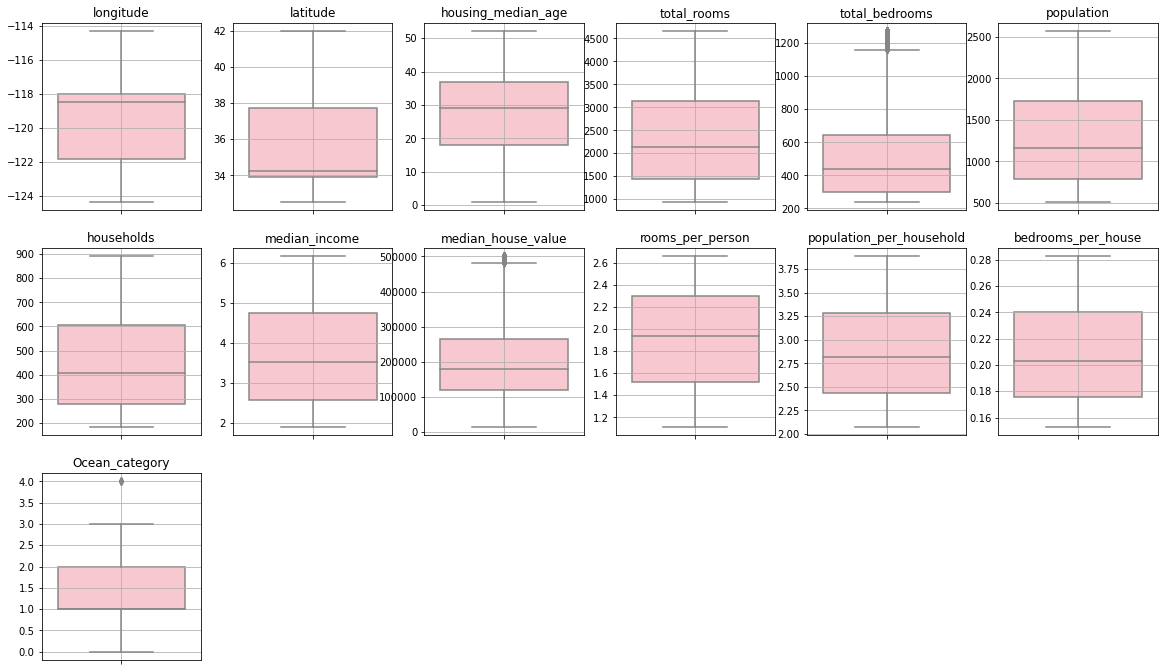

In [137]:
import scipy.stats
from scipy.stats.mstats import winsorize
import seaborn as sns
house['total_rooms'] = winsorize(house['total_rooms'], (0.1,0.1))
house['total_bedrooms'] = winsorize(house['total_bedrooms'], (0.15,0.05))
house['population'] = winsorize(house['population'], (0.1,0.1))
house['households'] = winsorize(house['households'], (0.1,0.1))
house['median_income'] = winsorize(house['median_income'], (0.1,0.1))
house['rooms_per_person'] = winsorize(house['rooms_per_person'], (0.1,0.1))
house['population_per_household'] = winsorize(house['population_per_household'], (0.1,0.1))
house['bedrooms_per_house'] = winsorize(house['bedrooms_per_house'], (0.1,0.1))

col_names = {'longitude':1,'latitude':2,'housing_median_age':3,'total_rooms':4,'total_bedrooms':5,'population':6,'households':7,'median_income':8,'median_house_value':9,'rooms_per_person':10,'population_per_household':11,'bedrooms_per_house':12,'Ocean_category':13}

fig = plt.figure(figsize=(20,20))
for variable,i in col_names.items():
                     plt.subplot(5,6,i)
                     sns.boxplot(y = house[variable], color = "pink")
                     plt.title(variable)
                     plt.ylabel('')
                     
                     plt.grid(True)
    
plt.show()

### After using winsorize, it seems that there ar no more outiars any more from plots above.

## Data exploration
### Next step I tried to analyze the correlation between variables and I chose to use heapmap

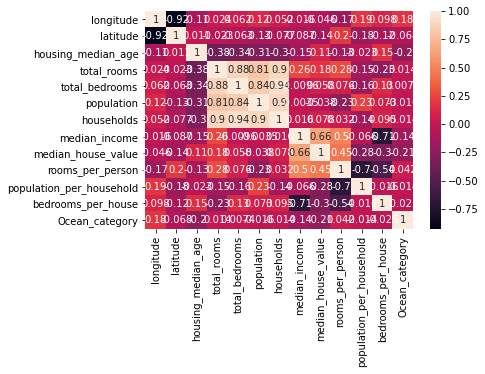

median_house_value          1.000000
median_income               0.659111
rooms_per_person            0.448395
total_rooms                 0.179113
housing_median_age          0.105623
households                  0.078273
total_bedrooms              0.057830
population                 -0.037742
longitude                  -0.045967
latitude                   -0.144160
Ocean_category             -0.210600
population_per_household   -0.279999
bedrooms_per_house         -0.299609
Name: median_house_value, dtype: float64


In [138]:

house.corr().median_house_value.sort_values(ascending=False)
import seaborn as sns
sns.heatmap(house.corr(), annot=True)
plt.show()

corr_matrix = house.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))

### From the plot and correlation matrix above, we can see that median_income and rooms_per_person are apparently positively related with house prices, and population_per_household and bedrooms_per_house  are apparently negetively related with house prices. It make senses in out reality, when people earn more money, the house they have are likely to have higher prices and when room for per person is bigger, house prices are higher. For population_per_household and bedrooms_per_house, they are not likely to make sense in reality.

In [139]:
house.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_person,population_per_household,bedrooms_per_house,Ocean_category
0,-122.23,37.88,41.0,941.0,239.0,510.0,184.0,6.1592,452600.0,NEAR BAY,2.655446,2.555556,0.152938,0
1,-122.22,37.86,21.0,4651.0,1106.0,2401.0,890.0,6.1592,358500.0,NEAR BAY,2.655446,2.109842,0.155797,0
2,-122.24,37.85,52.0,1467.0,239.0,510.0,184.0,6.1592,352100.0,NEAR BAY,2.655446,2.802260,0.152938,0
3,-122.25,37.85,52.0,1274.0,239.0,558.0,219.0,5.6431,341300.0,NEAR BAY,2.283154,2.547945,0.184458,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,2.655446,2.181467,0.172096,0


### To simply the analysis, I chose to divide median income into several categories.

<AxesSubplot:>

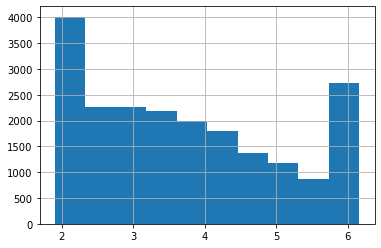

In [140]:
house['median_income'].hist()

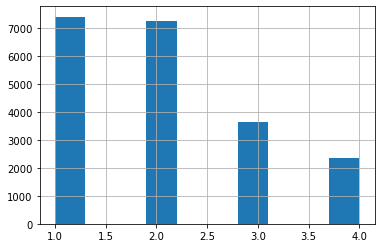

In [141]:
import numpy as np
house['incomes_category'] = pd.cut(house['median_income'], bins=[1.5, 3.0, 4.5, 6.0, np.inf], labels=[1, 2, 3, 4])
house['incomes_category'].hist()
plt.show()


<AxesSubplot:xlabel='incomes_category', ylabel='median_house_value'>

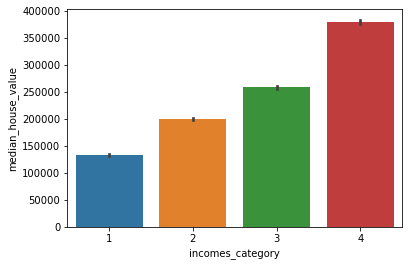

In [142]:
sns.barplot(x="incomes_category", y="median_house_value", data=house)

### From the plot we can see that when residuals' incomes increase with other variables keeping same , correspoding house prices will increase

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

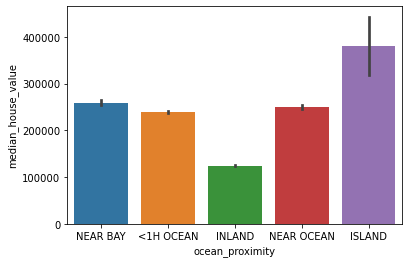

In [143]:
sns.barplot(x="ocean_proximity", y="median_house_value", data=house)

### From the plot we can see that house prices are highest when they are in islands and lowest when they are in inland. There are not too much differeces in prices when houses are in Near Bay, <1H Ocean or Near Ocean

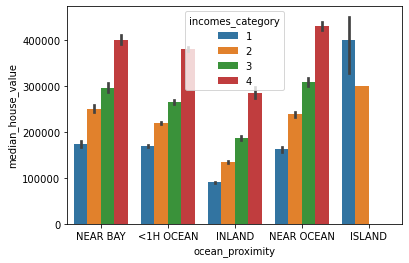

In [144]:
sns.barplot(x="ocean_proximity", y="median_house_value", hue="incomes_category", data=house)
plt.show()

### After analyzing house prices by considering positions and income at the same time, we can see that people who in 4 and 5 income categories do not live in island. It seems that house prices have the same pattern of increasing or decreasing when people in different income categories living in different positions except island. For example, hosues near ocean have highest prices and those in inland have lowest prices for poeple in different income categories.

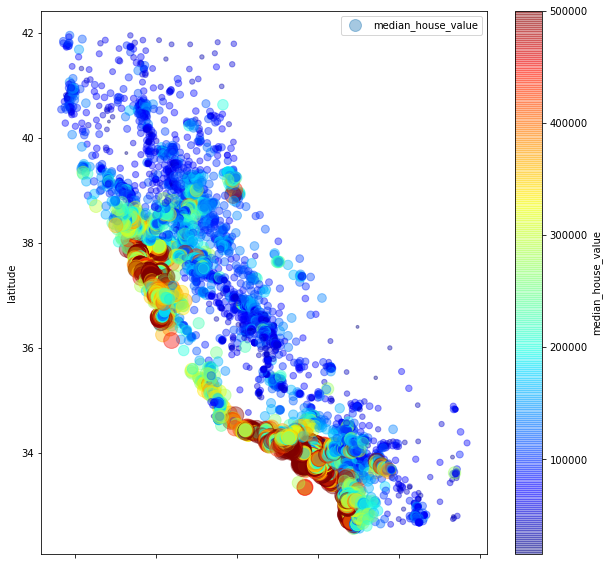

In [145]:
house.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=house['median_house_value']/1800, label='median_house_value',
figsize=(10, 10), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.show()

### From the plot we can see that house prices are highest when latitude is decreasing and longitude is increasing at the same time. It seems that  latitude and longitude are negetively linear related in equivalent house prices lines. 

## Data Preparation for Linear Regression for House Price Prediction

### For this step, I will first use StandardScaler to standardize the data.

In [146]:
data=house[['longitude','latitude','housing_median_age','median_house_value','median_income','rooms_per_person','population_per_household','bedrooms_per_house','Ocean_category','households','total_rooms','total_bedrooms','population'
            ]].copy()
from sklearn.preprocessing import StandardScaler
StandardScaler().fit_transform(data)



array([[-1.32783522,  1.05254828,  0.98214266, ..., -1.24176234,
        -0.99004873, -1.24119296],
       [-1.32284391,  1.04318455, -0.60701891, ...,  1.92703094,
         2.05773853,  1.68240658],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.79249408,
        -0.99004873, -1.24119296],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.12029992,
        -0.12527864, -0.47280112],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.45682406,
        -0.39244338, -0.88405309],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.33323895,
         0.33522901,  0.1147017 ]])

### Divided the dataset into train and test dataset

In [147]:
x = data[['longitude','latitude','housing_median_age','median_income','rooms_per_person','population_per_household','bedrooms_per_house','Ocean_category','households','total_rooms','total_bedrooms','population'
            ]].copy()
y = data['median_house_value']
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

### Used LinearRegression model in sklearn to train and estimate house prices

In [148]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
data = pd.DataFrame(data={"median_house_value": ypred.flatten()})
print(data.head())

   median_house_value
0        59553.451308
1       132976.385507
2       282655.358212
3       286599.372494
4       300142.844998


### Used Mean Absolute Error to calculate the error of the model

In [149]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ypred))


Mean Absolute Error: 52246.6805186799
